In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quora NLP/train.csv')
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
21949,21949,41257,41258,What is the best way to improve reading speed?,What are the best ways to develop reading spee...,1
382540,382540,514403,514404,How can I get free ebooks for reselling?,"What can I do in next 6-7 years to get a 30,00...",0
289000,289000,410049,410050,Does the upper or lower level of the leaf have...,How do I cope with overwhelmed?,0
226993,226993,335732,17732,"Which country has a better film industry, Chin...",Can India defeat China in a full-fledged war?,0
134357,134357,214757,214758,What were the odds of Leicester City winning t...,Considering the current form can Leicester Cit...,1


In [5]:
df_new=df.sample(30000,random_state=2)

df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [6]:
df_new.shape

(30000, 6)

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


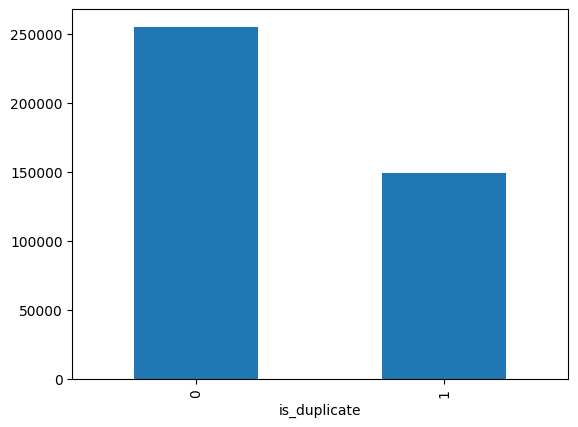

In [7]:
x=df['is_duplicate'].value_counts().plot(kind='bar')
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
df_new.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [10]:
df_new.duplicated().sum()

0

  ## FIND OUT THE UNIQUE QUESTIONS

In [11]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Unique Questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Repeated Questions',x[x].shape[0])

Unique Questions 537933
Repeated Questions 111780


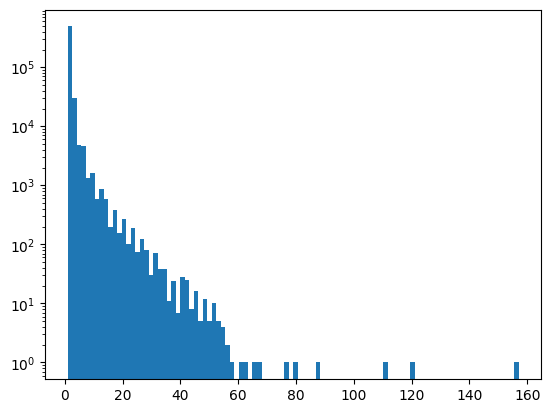

In [12]:
#Repeated Question Histogram
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [13]:
ques_df=df_new[['question1','question2']]
ques_df.sample(5)

,question1,question2
373593,I forgot my MI Account username and password. ...,How do I move apps to SD card on Xiaomi Redmi ...
4987,What is Quickbooks tech support number in Ariz...,What is the QuickBooks Hosting Support Number?
80318,What percentage of people with Hong Kong perma...,What percentage of Hong Kong Permanent Residen...
69852,How do I read manga?,How can you read manga on a Kindle?
198974,What are the safety precautions on handling sh...,What are the safety precautions on handling sh...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer


In [15]:
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)

q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)



In [16]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [17]:
temp_df['is_duplicate']=df_new['is_duplicate']

In [18]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)



0.746

In [21]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7376666666666667

## NOW DO SOME FEATURE ENGINEERING

In [22]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [23]:
df_new['word_common'] = df_new.apply(common_words, axis=1)
df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3


In [24]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))


In [25]:
df_new['word_total'] = df_new.apply(total_words, axis=1)
df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3,13


In [26]:
df_new['q1_len']=df_new['question1'].str.len()
df_new['q2_len']=df_new['question2'].str.len()
df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_common,word_total,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11,24,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7,23,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2,34,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0,32,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3,13,35,50


In [27]:
df_new['q1_num_words']=df_new['question1'].apply(lambda row : len(row.split(" ")))
df_new['q2_num_words']=df_new['question2'].apply(lambda row : len(row.split(" ")))
df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_common,word_total,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11,24,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7,23,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2,34,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0,32,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3,13,35,50,5,9


In [28]:
df_new['word_share'] = round(df_new['word_common']/df_new['word_total'],2)
df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_common,word_total,q1_len,q2_len,q1_num_words,q2_num_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11,24,76,77,12,12,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7,23,49,57,12,15,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2,34,105,120,25,17,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0,32,59,146,12,30,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3,13,35,50,5,9,0.23


In [29]:
ques_df=df_new[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [30]:
final_df=df_new.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,word_common,word_total,q1_len,q2_len,q1_num_words,q2_num_words,word_share
398782,1,11,24,76,77,12,12,0.46
115086,0,7,23,49,57,12,15,0.30
327711,0,2,34,105,120,25,17,0.06
367788,0,0,32,59,146,12,30,0.00
151235,0,3,13,35,50,5,9,0.23


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)


In [32]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(30000, 6000)

In [33]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,word_common,word_total,q1_len,q2_len,q1_num_words,q2_num_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,11,24,76,77,12,12,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,7,23,49,57,12,15,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,2,34,105,120,25,17,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,32,59,146,12,30,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,3,13,35,50,5,9,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)
#0.7683333333333333


0.7681666666666667

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7633333333333333